In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kaggle

In [3]:
!kaggle datasets list -s employee

ref                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tawfikelmetwally/employee-dataset                 Employee dataset                                    19KB  2023-09-06 18:15:55          44813        386  0.9411765        
HRAnalyticRepository/employee-attrition-data      Employee Attrition                                 501KB  2017-04-26 18:39:14          20156        259  0.8235294        
davinwijaya/employee-turnover                     Employee Turnover                                   17KB  2020-09-05 12:40:41          11039        102  1.0              
patelprashant/employee-attrition                  Employee Attrition                                  50KB  2018-02-07 00:30:16        

In [4]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset
!kaggle datasets download -d stealthtechnologies/employee-attrition-dataset
!kaggle datasets download -d thedevastator/employee-attrition-and-factors
!kaggle datasets download -d davinwijaya/employee-turnover

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset
License(s): apache-2.0
employee-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors
License(s): CC0-1.0
employee-attrition-and-factors.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/davinwijaya/employee-turnover
License(s): CC-BY-NC-SA-4.0
employee-turnover.zip: Skipping, found more recently modified local copy (use --force to force download)


In [211]:
import os
import zipfile

datasets = [
    "ibm-hr-analytics-attrition-dataset.zip",
    "employee-attrition-dataset.zip",
    "employee-turnover.zip",
    "employee-attrition-and-factors.zip"
]

for dataset in datasets:
    with zipfile.ZipFile(dataset, "r") as zip_ref:
        zip_ref.extractall("./datasets")  # Extrae los archivos en la carpeta "datasets"

# Verificar que los archivos se extrajeron correctamente
print(os.listdir("./datasets"))

['clean_merged.csv', 'employee-attrition-and-factors.zip', 'employee-attrition-dataset.zip', 'employee-turnover.zip', 'extended_merged.csv', 'HR_Analytics.csv.csv', 'ibm-hr-analytics-attrition-dataset.zip', 'merged_rotation_imputed.csv', 'merged_rotation_imputed.zip', 'test.csv', 'train.csv', 'turnover.csv', 'WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [213]:
# Volver a importar librerías y cargar los archivos después del reset
import pandas as pd

# Definir rutas de los archivos subidos
file_paths = {
    "HR_Analytics": "./datasets/HR_Analytics.csv.csv",
    "Test": "./datasets/test.csv",
    "Train": "./datasets/train.csv",
    "Turnover": "./datasets/turnover.csv",
    "WA_HR_Attrition": "./datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv"
}

# Intentar leer los archivos con diferentes codificaciones para evitar errores de decodificación
encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'utf-8-sig']

# Intentar cargar los datasets con la codificación adecuada
datasets = {}
for name, path in file_paths.items():
    for encoding in encodings:
        try:
            datasets[name] = pd.read_csv(path, encoding=encoding)
            print(f"✅ {name} cargado correctamente con encoding {encoding}.")
            break  # Si se carga sin errores, salir del loop
        except UnicodeDecodeError:
            continue  # Si hay error, intentar con otro encoding

# Mostrar las dimensiones de cada dataset cargado
info_dict = {name: df.shape for name, df in datasets.items()}
info_dict



✅ HR_Analytics cargado correctamente con encoding utf-8.
✅ Test cargado correctamente con encoding utf-8.
✅ Train cargado correctamente con encoding utf-8.
✅ Turnover cargado correctamente con encoding ISO-8859-1.
✅ WA_HR_Attrition cargado correctamente con encoding utf-8.


{'HR_Analytics': (1470, 35),
 'Test': (14900, 24),
 'Train': (59598, 24),
 'Turnover': (1129, 16),
 'WA_HR_Attrition': (1470, 35)}

In [215]:
# Obtener los nombres de las columnas de cada dataset
columnas_por_dataset = {name: df.columns.tolist() for name, df in datasets.items()}

# Mostrar las columnas de cada dataset para identificar variables comunes y exclusivas
columnas_por_dataset


{'HR_Analytics': ['Age',
  'Attrition',
  'BusinessTravel',
  'DailyRate',
  'Department',
  'DistanceFromHome',
  'Education',
  'EducationField',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'Gender',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'Over18',
  'OverTime',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 'Test': ['Employee ID',
  'Age',
  'Gender',
  'Years at Company',
  'Job Role',
  'Monthly Income',
  'Work-Life Balance',
  'Job Satisfaction',
  'Performance Rating',
  'Number of Promotions',
  'Overtime',
  'Distance from Home',
  'Education Level',
  'Marital Status',
  'Number of Depend

In [217]:
# Step 1: Ensure all datasets have a proper Employee_ID before merging
for dataset_name, df in datasets.items():
    if "Employee_ID" not in df.columns:
        df["Employee_ID"] = dataset_name[:3].upper() + "_" + df.index.astype(str)

# Step 2: Merge Train and Test first (keeping Employee_ID unchanged)
merged_df = pd.concat([datasets["Train"], datasets["Test"]], ignore_index=True)

# Step 3: Merge remaining datasets while ensuring a standardized unique ID
other_datasets = ["HR_Analytics", "WA_HR_Attrition", "Turnover"]

for dataset_name in other_datasets:
    df = datasets[dataset_name].copy()
    
    # Ensure Employee_ID exists
    if "Employee_ID" not in df.columns:
        df["Employee_ID"] = dataset_name[:3].upper() + "_" + df.index.astype(str)
    
    # Merge datasets on Employee_ID
    merged_df = pd.merge(merged_df, df, on="Employee_ID", how="outer", suffixes=("", f"_{dataset_name}"))

# Generate a new standardized unique Employee ID
merged_df["New_Employee_ID"] = "EMP_" + merged_df.index.astype(str)

# Verify final dataset structure
merged_df.shape




(78567, 112)

In [218]:
# Check uniqueness of the New_Employee_ID column again
unique_ids_count = merged_df["New_Employee_ID"].nunique()
total_rows = merged_df.shape[0]

# Verify if there are duplicate IDs
duplicate_ids = total_rows - unique_ids_count

# Display results
unique_ids_count, duplicate_ids



(78567, 0)

In [219]:
# Step 1: Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values and their count
missing_values


novator                     77438
coach                       77438
stag                        77438
event                       77438
gender                      77438
                            ...  
Innovation Opportunities     4069
Company Reputation           4069
Employee Recognition         4069
Attrition                    4069
Employee ID                  4069
Length: 110, dtype: int64

In [223]:
# 1️⃣ Remove columns with more than 95% missing values
threshold = 0.95 * len(merged_df)
columns_to_drop = missing_values[missing_values > threshold].index

merged_df.drop(columns=columns_to_drop, inplace=True)

# 2️⃣ Impute missing values in key variables
# Impute numerical columns with median
numeric_vars = ["Age", "Years at Company", "Monthly Income", "Distance from Home"]
for col in numeric_vars:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# Impute categorical columns with mode (most frequent value)
categorical_vars = ["Gender", "Attrition", "Company Size", "Job Role", "Employee Recognition"]
for col in categorical_vars:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

# Verify remaining missing values
remaining_missing_values = merged_df.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

remaining_missing_values


Employee ID                 4069
Work-Life Balance           4069
Job Satisfaction            4069
Performance Rating          4069
Number of Promotions        4069
Overtime                    4069
Education Level             4069
Marital Status              4069
Number of Dependents        4069
Job Level                   4069
Company Tenure              4069
Remote Work                 4069
Leadership Opportunities    4069
Innovation Opportunities    4069
Company Reputation          4069
dtype: int64

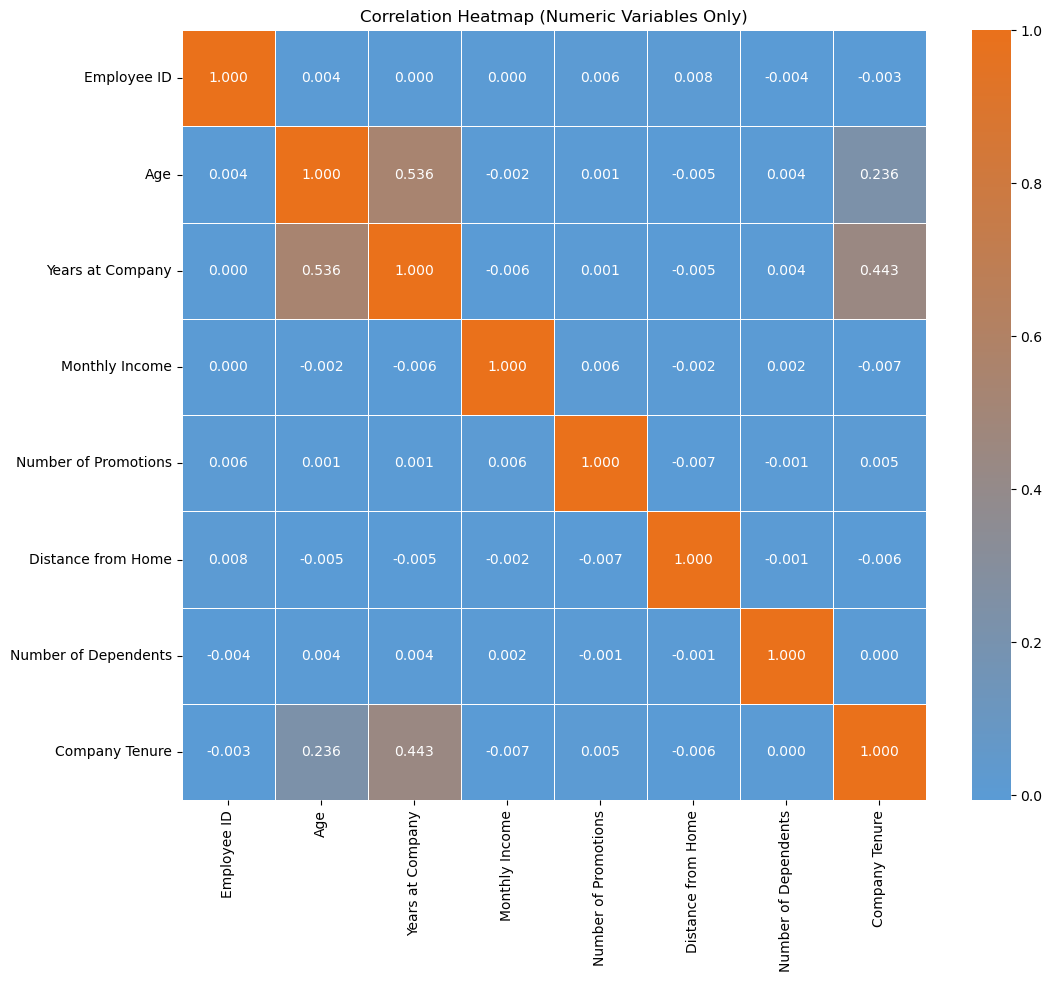

In [225]:
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt

# Define Mikon Insights color palette
mikon_palette = ["#5A9BD5", "#EA711B"]

# Create a custom colormap based on Mikon Insights palette
mikon_cmap = mcolors.LinearSegmentedColormap.from_list("mikon_cmap", mikon_palette)

# Select only numeric variables for correlation heatmap
numeric_df = merged_df.select_dtypes(include=["number"])

# Plot heatmap with Mikon Insights palette
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap=mikon_cmap, fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

In [227]:
# Impute remaining categorical variables with the mode (most frequent value)
remaining_categorical_vars = [
    "Work-Life Balance", "Job Satisfaction", "Performance Rating", "Number of Promotions",
    "Overtime", "Education Level", "Marital Status", "Number of Dependents",
    "Job Level", "Company Tenure", "Remote Work", "Leadership Opportunities",
    "Innovation Opportunities", "Company Reputation"
]

for col in remaining_categorical_vars:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Verify if any missing values remain
final_check_missing_values = merged_df.isnull().sum()
final_check_missing_values = final_check_missing_values[final_check_missing_values > 0]

final_check_missing_values


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16720\3400435516.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)


Employee ID    4069
dtype: int64

In [229]:
merged_df.to_csv("./datasets/merged_rotation_imputed.csv", encoding="utf8")

In [231]:
merged_df.shape

(78567, 26)

In [233]:
merged_df.dtypes

Employee ID                 float64
Age                         float64
Gender                       object
Years at Company            float64
Job Role                     object
Monthly Income              float64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home          float64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure              float64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
Employee_ID                  object
New_Employee_ID              object
dtype: object

In [235]:
merged_df.duplicated(subset=["New_Employee_ID"]).sum()

0

In [237]:
merged_df.columns = merged_df.columns.str.lower().str.replace(" ", "_")

In [239]:
merged_df["attrition"] = merged_df["attrition"].map({"Stayed": 0, "Left": 1}).astype(int)

In [241]:
categorical_vars = [
    "gender", "job_role", "work-life_balance", "job_satisfaction", "performance_rating",
    "overtime", "education_level", "marital_status", "job_level", "company_size",
    "remote_work", "leadership_opportunities", "innovation_opportunities",
    "company_reputation", "employee_recognition"
]

for col in categorical_vars:
    merged_df[col] = merged_df[col].astype("category")

In [243]:
binary_columns = ["overtime", "remote_work"]
for col in binary_columns:
    merged_df[col] = merged_df[col].map({"Yes": 1, "No": 0}).astype(int)

In [245]:
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78567 entries, 0 to 78566
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   employee_id               74498 non-null  float64 
 1   age                       78567 non-null  float64 
 2   gender                    78567 non-null  category
 3   years_at_company          78567 non-null  float64 
 4   job_role                  78567 non-null  category
 5   monthly_income            78567 non-null  float64 
 6   work-life_balance         78567 non-null  category
 7   job_satisfaction          78567 non-null  category
 8   performance_rating        78567 non-null  category
 9   number_of_promotions      78567 non-null  float64 
 10  overtime                  78567 non-null  int32   
 11  distance_from_home        78567 non-null  float64 
 12  education_level           78567 non-null  category
 13  marital_status            78567 non-null  cate

In [247]:
merged_df.drop(columns=["employee_id"], inplace=True)

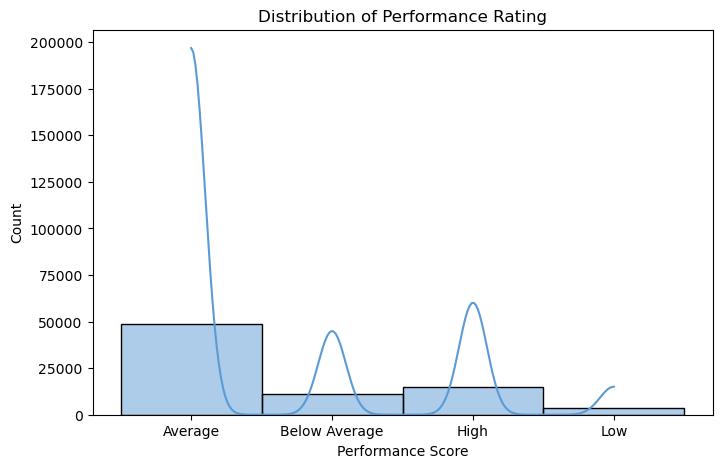

In [249]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["performance_rating"], bins=20, kde=True)
plt.title("Distribution of Performance Rating")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.show()

In [251]:
performance_map = {"Low": 1, "Average": 2, "High": 3, "Excellent": 4}

# Map values and fill NaNs with the most frequent rating
merged_df["performance_rating"] = merged_df["performance_rating"].map(performance_map)
merged_df["performance_rating"].fillna(merged_df["performance_rating"].mode()[0], inplace=True)

# Convert to integer
merged_df["performance_rating"] = merged_df["performance_rating"].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16720\4160264562.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["performance_rating"].fillna(merged_df["performance_rating"].mode()[0], inplace=True)


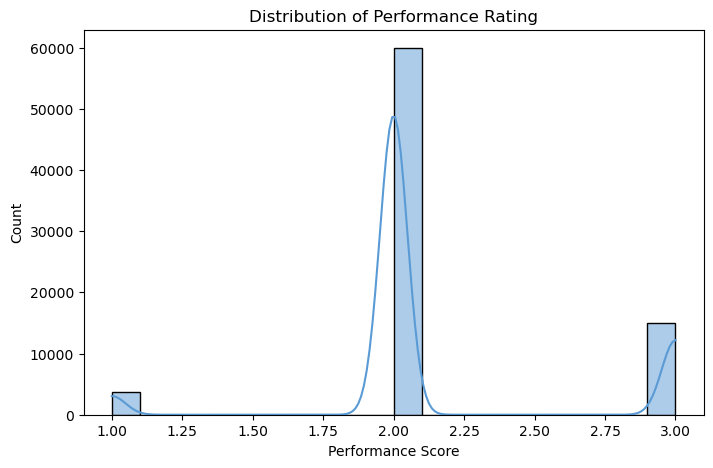

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(merged_df["performance_rating"], bins=20, kde=True)
plt.title("Distribution of Performance Rating")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.show()

In [255]:
binary_columns = ["leadership_opportunities", "innovation_opportunities"]
for col in binary_columns:
    merged_df[col] = merged_df[col].map({"Yes": 1, "No": 0}).astype("int")

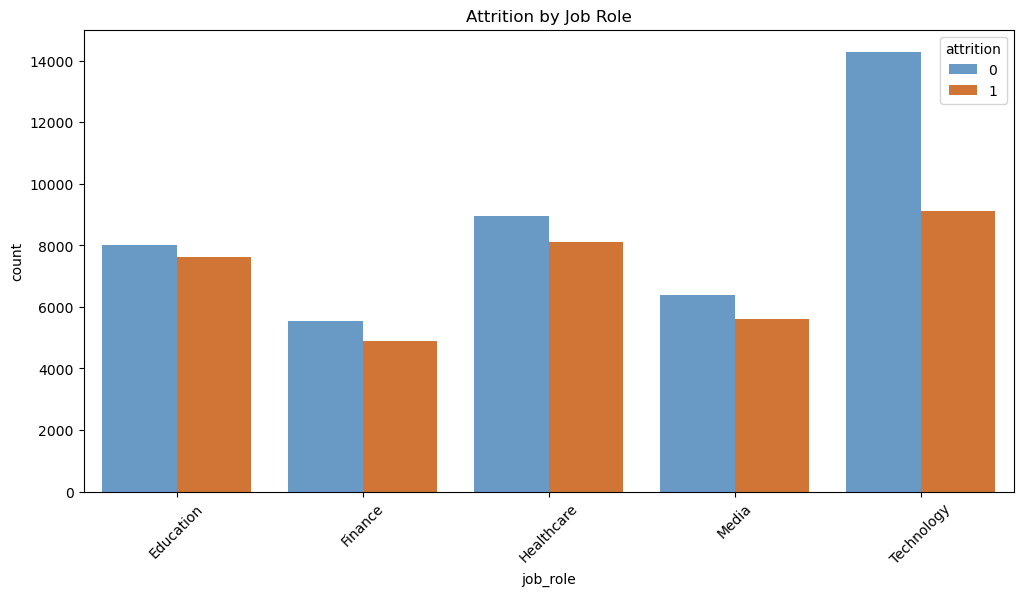

In [257]:
plt.figure(figsize=(12,6))
sns.countplot(x="job_role", hue="attrition", data=merged_df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

In [259]:
rating_map = {
    "Poor": 1, "Low": 1,
    "Fair": 2, "Medium": 2,
    "Good": 3, "High": 3,
    "Excellent": 4, "Very High": 4
}

for col in ["company_reputation", "employee_recognition"]:
    # First, replace only known values with mapped values
    merged_df[col] = merged_df[col].map(rating_map)

    # Then, fill NaN values with the mode (most frequent rating)
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

    # Convert to integer safely
    merged_df[col] = merged_df[col].astype(int)


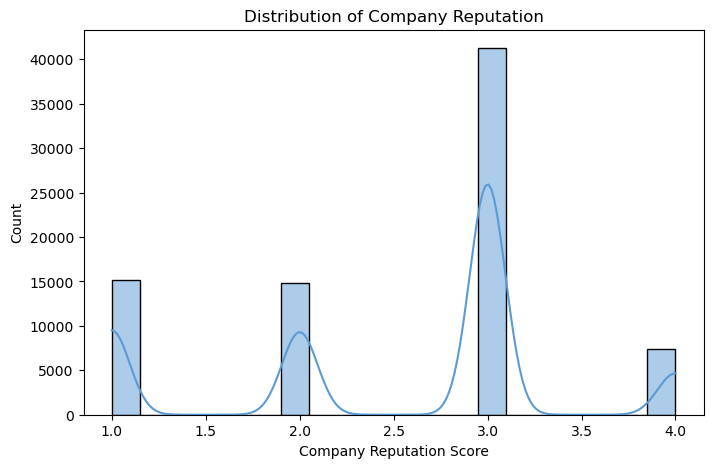

In [261]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["company_reputation"], bins=20, kde=True)
plt.title("Distribution of Company Reputation")
plt.xlabel("Company Reputation Score")
plt.ylabel("Count")
plt.show()

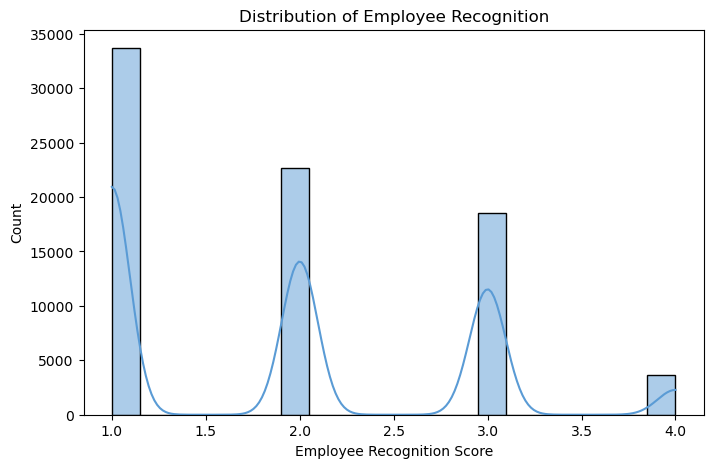

In [263]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["employee_recognition"], bins=20, kde=True)
plt.title("Distribution of Employee Recognition")
plt.xlabel("Employee Recognition Score")
plt.ylabel("Count")
plt.show()

In [265]:
merged_df.isnull().sum()

age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work-life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
new_employee_id             0
dtype: int64

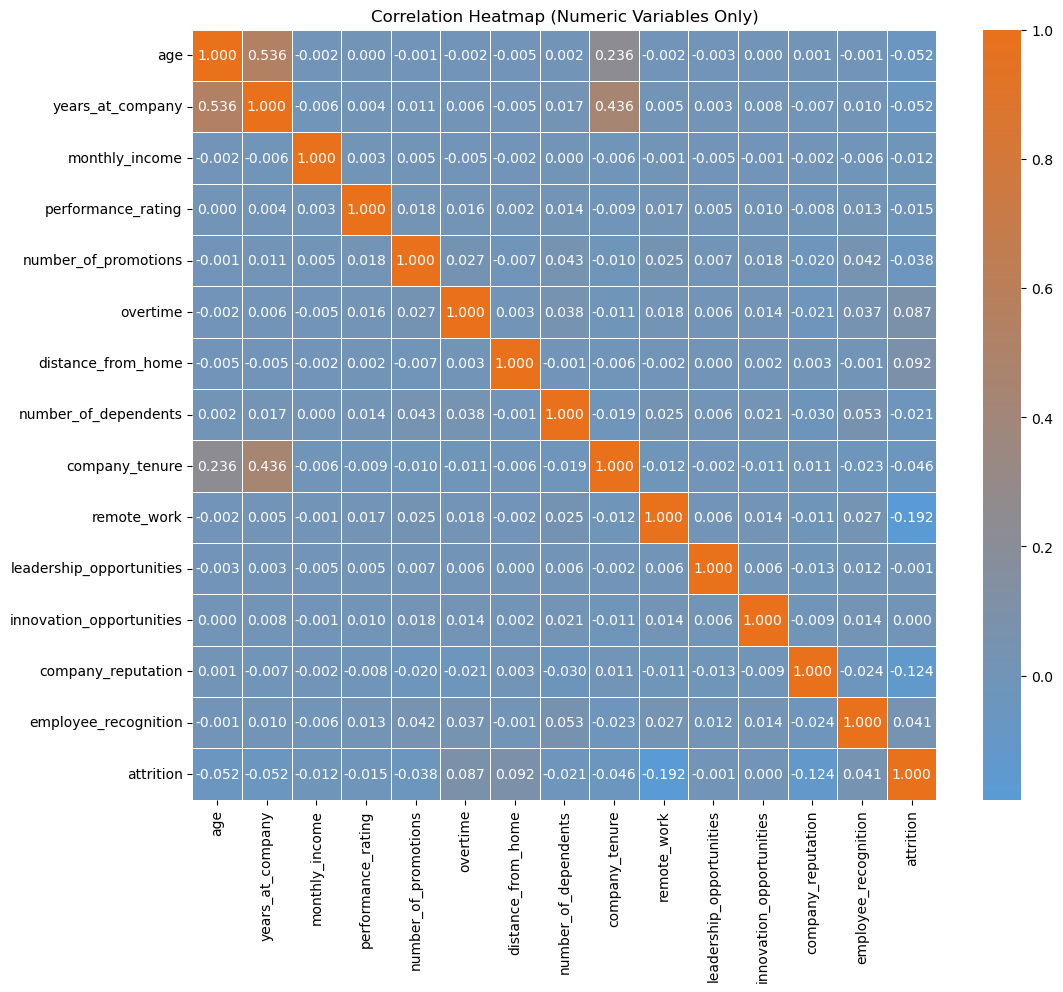

In [267]:
import matplotlib.colors as mcolors

# Define Mikon Insights color palette
mikon_palette = ["#5A9BD5", "#EA711B"]

# Create a custom colormap based on Mikon Insights palette
mikon_cmap = mcolors.LinearSegmentedColormap.from_list("mikon_cmap", mikon_palette)

# Select only numeric variables for correlation heatmap
numeric_df = merged_df.select_dtypes(include=["number"])

# Plot heatmap with Mikon Insights palette
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap=mikon_cmap, fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

In [269]:
merged_df["income_to_experience"] = merged_df["monthly_income"] / (merged_df["years_at_company"] + 1)

In [271]:
merged_df["promotions_per_year"] = merged_df["number_of_promotions"] / (merged_df["years_at_company"] + 1)

In [273]:
merged_df["years_at_company"].value_counts(bins=10)

(0.949, 6.0]    17995
(11.0, 16.0]    16149
(6.0, 11.0]     14793
(16.0, 21.0]     8972
(21.0, 26.0]     7007
(26.0, 31.0]     5303
(31.0, 36.0]     3750
(36.0, 41.0]     2579
(41.0, 46.0]     1501
(46.0, 51.0]      518
Name: count, dtype: int64

In [275]:
merged_df["work_stability"] = merged_df["years_at_company"] * (merged_df["number_of_promotions"] + 1)

In [277]:
merged_df["salary_progression"] = merged_df["monthly_income"] / (merged_df["years_at_company"] + 1)


In [279]:
merged_df["income_group"] = pd.qcut(merged_df["monthly_income"], q=4, labels=["Low", "Medium", "High", "Very High"])
merged_df.groupby("income_group")["attrition"].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16720\1189355372.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby("income_group")["attrition"].mean()


income_group
Low          0.485083
Medium       0.383008
High         0.471326
Very High    0.470507
Name: attrition, dtype: float64

In [281]:
merged_df["experience_group"] = pd.cut(merged_df["years_at_company"], bins=[0, 2, 5, 10, 20, 50, 60], labels=["<2", "2-5", "5-10", "10-20", "20-50", "+50"])
merged_df.groupby("experience_group")["attrition"].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16720\952666208.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby("experience_group")["attrition"].mean()


experience_group
<2       0.529122
2-5      0.530957
5-10     0.516227
10-20    0.378219
20-50    0.437497
+50      0.393939
Name: attrition, dtype: float64

In [283]:
merged_df["commute_factor"] = merged_df["distance_from_home"] * merged_df["company_reputation"]

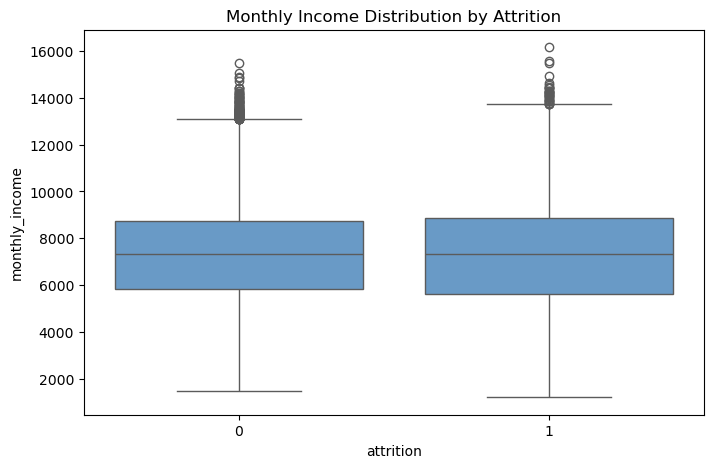

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define Mikon Insights color palette
mikon_palette = ["#5A9BD5", "#EA711B", "#0047AB", "#FF7043", "#001F54"]

# Apply the Mikon palette to visualizations
sns.set_palette(mikon_palette)

# Boxplot: Monthly Income by Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x="attrition", y="monthly_income", data=merged_df)
plt.title("Monthly Income Distribution by Attrition")
plt.show()

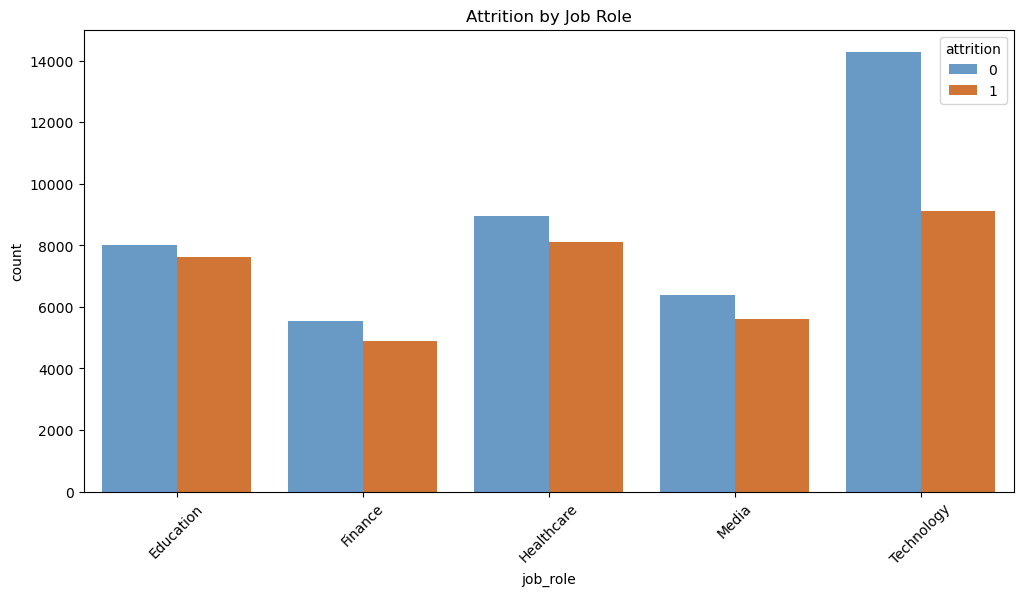

In [287]:
plt.figure(figsize=(12,6))
sns.countplot(x="job_role", hue="attrition", data=merged_df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

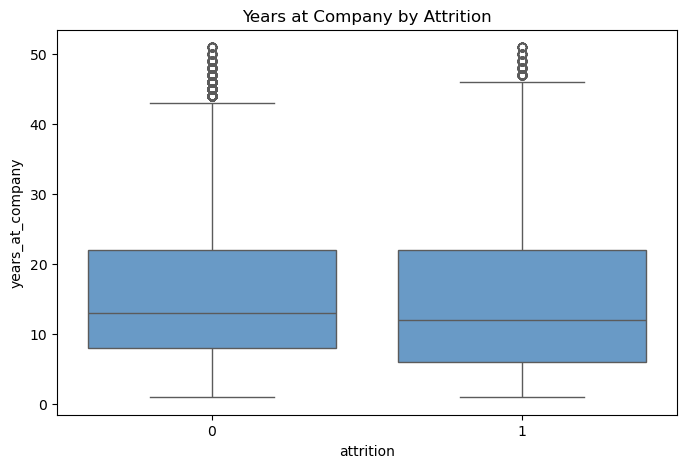

In [289]:
plt.figure(figsize=(8,5))
sns.boxplot(x="attrition", y="years_at_company", data=merged_df)
plt.title("Years at Company by Attrition")
plt.show()

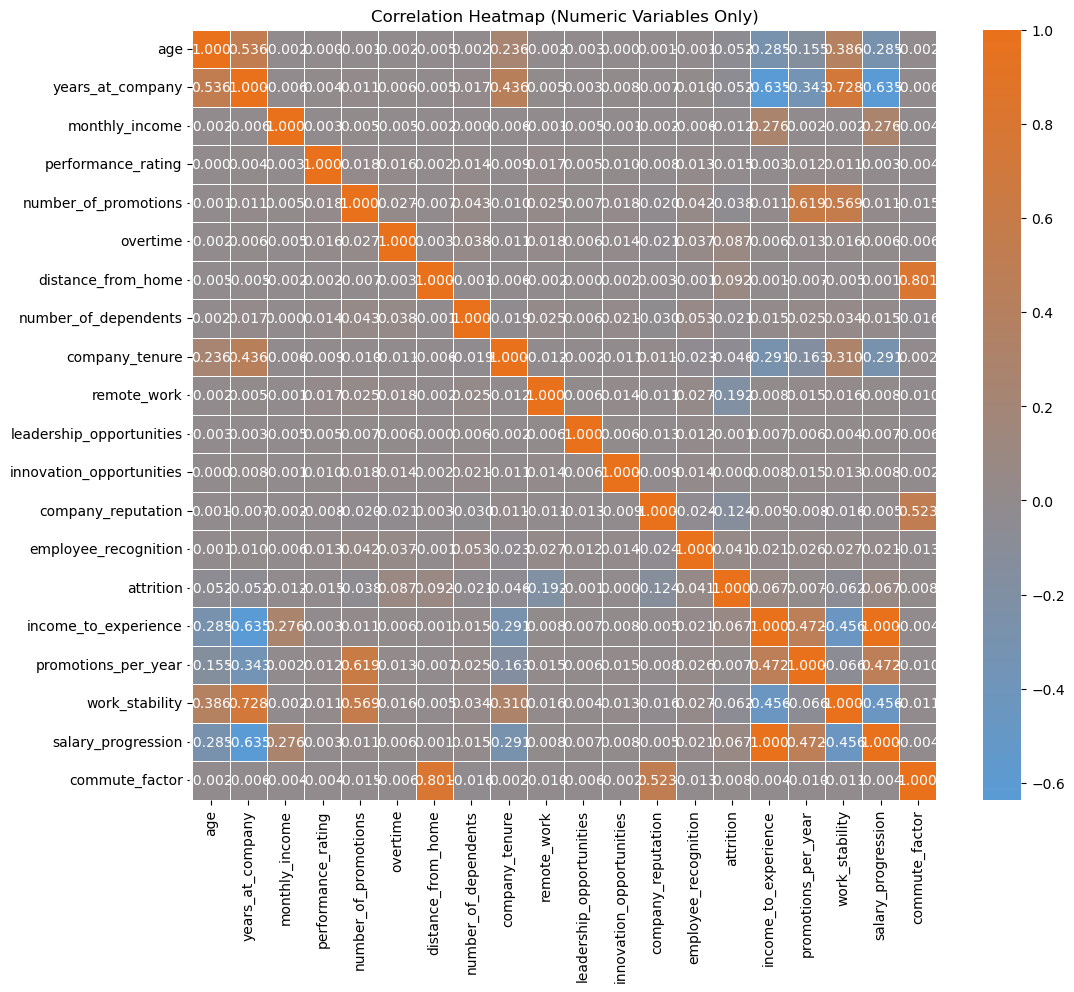

In [291]:
# Select only numeric variables for correlation heatmap
numeric_df = merged_df.select_dtypes(include=["number"])

# Plot heatmap with Mikon Insights palette
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap=mikon_cmap, fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

In [293]:
merged_df.describe()

,age,years_at_company,monthly_income,performance_rating,number_of_promotions,overtime,distance_from_home,number_of_dependents,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,income_to_experience,promotions_per_year,work_stability,salary_progression,commute_factor
count,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000,78567.000000
mean,38.554100,15.580651,7301.897578,2.142299,0.789797,0.309812,49.992020,1.564855,56.207683,0.180712,0.046495,0.154060,2.521377,1.900760,0.450189,794.982293,0.087147,28.007471,794.982293,126.122494
std,11.766852,10.945865,2096.055109,0.465836,0.986593,0.462419,27.765423,1.556443,24.818090,0.384782,0.210557,0.361008,0.907236,0.917582,0.497516,845.947837,0.174439,27.555764,845.947837,86.874331
min,18.000000,1.000000,1226.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,47.631579,0.000000,1.000000,47.631579,1.000000
25%,29.000000,7.000000,5733.500000,2.000000,0.000000,0.000000,27.000000,0.000000,37.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,297.017857,0.000000,10.000000,297.017857,54.000000
50%,39.000000,13.000000,7348.000000,2.000000,0.000000,0.000000,50.000000,1.000000,58.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,524.857143,0.000000,19.000000,524.857143,112.000000
75%,48.000000,22.000000,8792.000000,2.000000,1.000000,1.000000,73.000000,3.000000,74.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,908.000000,0.100000,36.000000,908.000000,183.000000
max,59.000000,51.000000,16149.000000,3.000000,4.000000,1.000000,99.000000,6.000000,128.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,7092.500000,2.000000,255.000000,7092.500000,396.000000


In [295]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78567 entries, 0 to 78566
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       78567 non-null  float64 
 1   gender                    78567 non-null  category
 2   years_at_company          78567 non-null  float64 
 3   job_role                  78567 non-null  category
 4   monthly_income            78567 non-null  float64 
 5   work-life_balance         78567 non-null  category
 6   job_satisfaction          78567 non-null  category
 7   performance_rating        78567 non-null  int32   
 8   number_of_promotions      78567 non-null  float64 
 9   overtime                  78567 non-null  int32   
 10  distance_from_home        78567 non-null  float64 
 11  education_level           78567 non-null  category
 12  marital_status            78567 non-null  category
 13  number_of_dependents      78567 non-null  floa

In [297]:
merged_df.isnull().sum()

age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work-life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
new_employee_id             0
income_to_experience        0
promotions_per_year         0
work_stability              0
salary_progression          0
income_group                0
experience_group            0
commute_factor              0
dtype: int64

In [299]:
merged_df.to_csv("./datasets/extended_merged.csv", encoding="utf8")

In [301]:
extended_merged = merged_df.copy()

In [303]:
# Check unique values for categorical variables before encoding
categorical_cols = list(extended_merged.select_dtypes(include=['object', 'category']).columns)

# Display unique values for each categorical column
unique_values = {col: extended_merged[col].unique() for col in categorical_cols}
unique_values

{'gender': ['Male', 'Female']
 Categories (2, object): ['Female', 'Male'],
 'job_role': ['Technology', 'Healthcare', 'Education', 'Media', 'Finance']
 Categories (5, object): ['Education', 'Finance', 'Healthcare', 'Media', 'Technology'],
 'work-life_balance': ['Good', 'Excellent', 'Poor', 'Fair']
 Categories (4, object): ['Excellent', 'Fair', 'Good', 'Poor'],
 'job_satisfaction': ['High', 'Low', 'Very High', 'Medium']
 Categories (4, object): ['High', 'Low', 'Medium', 'Very High'],
 'education_level': ['Bachelor’s Degree', 'Master’s Degree', 'Associate Degree', 'High School', 'PhD']
 Categories (5, object): ['Associate Degree', 'Bachelor’s Degree', 'High School', 'Master’s Degree', 'PhD'],
 'marital_status': ['Married', 'Single', 'Divorced']
 Categories (3, object): ['Divorced', 'Married', 'Single'],
 'job_level': ['Entry', 'Mid', 'Senior']
 Categories (3, object): ['Entry', 'Mid', 'Senior'],
 'company_size': ['Medium', 'Large', 'Small']
 Categories (3, object): ['Large', 'Medium', 'Sm

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# ✅ Standardization (Normal-like Distributions)
extended_merged["years_at_company_original"] = extended_merged["years_at_company"]# Store original before re-scaling
standardize_cols = ["age", "years_at_company", "monthly_income", "company_tenure"]
scaler = StandardScaler()
extended_merged[standardize_cols] = scaler.fit_transform(extended_merged[standardize_cols])

# ✅ Normalization (Skewed Data)
normalize_cols = ["distance_from_home", "income_to_experience", "promotions_per_year", 
                  "work_stability", "salary_progression", "commute_factor"]
minmax_scaler = MinMaxScaler()
extended_merged[normalize_cols] = minmax_scaler.fit_transform(extended_merged[normalize_cols])

# ✅ Binary Encoding for Gender
extended_merged["gender"] = extended_merged["gender"].map({"Male": 1, "Female": 0}).astype(int)

# ✅ Ordinal Encoding for Ordered Categories
ordinal_map = {
    "work-life_balance": {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4},
    "job_satisfaction": {"Low": 1, "Medium": 2, "High": 3, "Very High": 4},
    "job_level": {"Entry": 1, "Mid": 2, "Senior": 3}
}

for col, mapping in ordinal_map.items():
    extended_merged[col] = extended_merged[col].map(mapping).astype(int)

# ✅ One-Hot Encoding (Nominal Categories)
extended_merged = pd.get_dummies(extended_merged, columns=["job_role", "marital_status", "education_level", "company_size","income_group", "experience_group"], drop_first=True)

# ✅ Final Check
print(extended_merged.dtypes)
print("Remaining missing values:", extended_merged.isnull().sum().sum())  # Should be 0

age                                  float64
gender                                 int32
years_at_company                     float64
monthly_income                       float64
work-life_balance                      int32
job_satisfaction                       int32
performance_rating                     int32
number_of_promotions                 float64
overtime                               int32
distance_from_home                   float64
number_of_dependents                 float64
job_level                              int32
company_tenure                       float64
remote_work                            int32
leadership_opportunities               int32
innovation_opportunities               int32
company_reputation                     int32
employee_recognition                   int32
attrition                              int32
new_employee_id                       object
income_to_experience                 float64
promotions_per_year                  float64
work_stabi

In [307]:
print(extended_merged.isnull().sum()[extended_merged.isnull().sum() > 0])

Series([], dtype: int64)


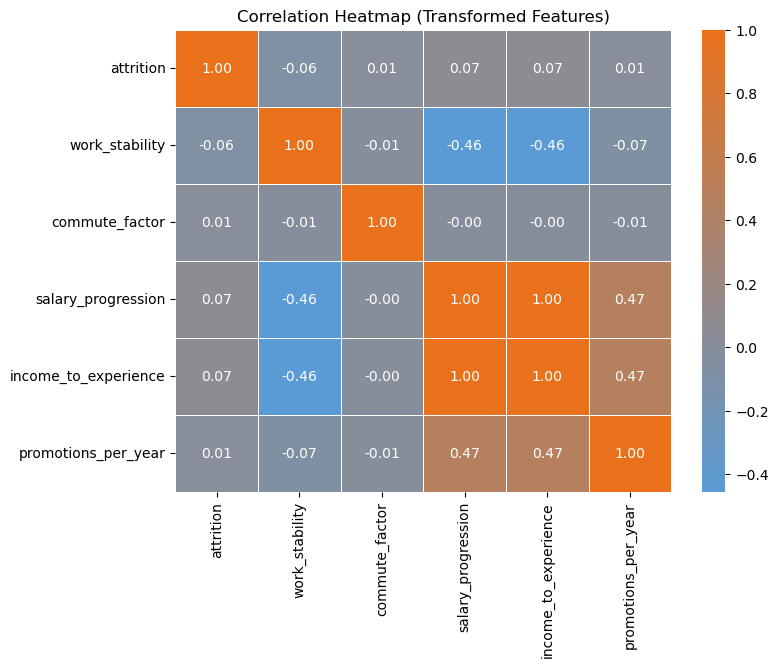

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations for transformed & new features
selected_features = ["attrition", "work_stability", "commute_factor", "salary_progression", 
                     "income_to_experience", "promotions_per_year"]

plt.figure(figsize=(8,6))
sns.heatmap(extended_merged[selected_features].corr(), annot=True, cmap=mikon_cmap, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Transformed Features)")
plt.show()


In [311]:
extended_merged.drop(columns=["income_to_experience"], inplace=True)  # Keeping salary_progression

In [313]:
extended_merged.drop(columns=["commute_factor"], inplace=True)

In [315]:
extended_merged.to_csv("./datasets/clean_merged.csv", encoding="utf8")

In [317]:
clean_merged = extended_merged.copy()

## Modeling

In [60]:
import numpy as np
# Model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [61]:
# Define features (X) and target variable (y)
X = clean_merged.drop(columns=["attrition", "new_employee_id", "years_at_company_original"])  # Drop target and unique ID
y = clean_merged["attrition"]  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 62853
Testing samples: 15714


In [62]:
def baseline_report(model, X_train, X_test, y_train, y_test, name, threshold=0.5):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1'))
    
    # Get prediction probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of class 1 (attrition)
    
    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    mcm = multilabel_confusion_matrix(y_test, y_pred)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    specificities = tn / (tn+fp)
    specificity = (specificities.sum())/ 2  # Adjust division if needed

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'specificity'  : [specificity]
                            })   
    return df_model

In [63]:
models = {'logit': LogisticRegression(max_iter=300),
          'randomforest': RandomForestClassifier(),
          'xgboost': XGBClassifier()
         }

In [64]:
# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_df

,model,accuracy,precision,recall,f1score,specificity
0,logit,0.755254,0.738796,0.703759,0.720962,0.753321
0,randomforest,0.756479,0.741906,0.709882,0.723990,0.752981
0,xgboost,0.761937,0.733785,0.732144,0.734866,0.759416


In [65]:
models_df.to_csv("./ml_models.csv")

In [66]:
# Set threshold
custom_threshold = 0.4

# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_df

,model,accuracy,precision,recall,f1score,specificity
0,logit,0.754904,0.739046,0.703334,0.720294,0.753321
0,randomforest,0.757275,0.739882,0.710696,0.725850,0.752775
0,xgboost,0.760489,0.733571,0.734834,0.733545,0.759416


In [67]:
models_df.to_csv("./ml_models0,4.csv")

In [68]:
# Set threshold (e.g., 0.33 based on previous optimization)
custom_threshold = 0.35

# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_df

,model,accuracy,precision,recall,f1score,specificity
0,logit,0.754936,0.739199,0.703688,0.720513,0.753321
0,randomforest,0.757704,0.741499,0.708784,0.726593,0.754135
0,xgboost,0.760011,0.734073,0.734940,0.734211,0.759416


In [69]:
models_df.to_csv("./ml_models0,35.csv")

In [70]:
# Set threshold
custom_threshold = 0.3

# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_df

,model,accuracy,precision,recall,f1score,specificity
0,logit,0.755207,0.738633,0.703263,0.720687,0.753321
0,randomforest,0.757402,0.742522,0.708395,0.723946,0.753306
0,xgboost,0.759868,0.734874,0.734516,0.733515,0.759416


In [71]:
models_df.to_csv("./ml_models0,3.csv")

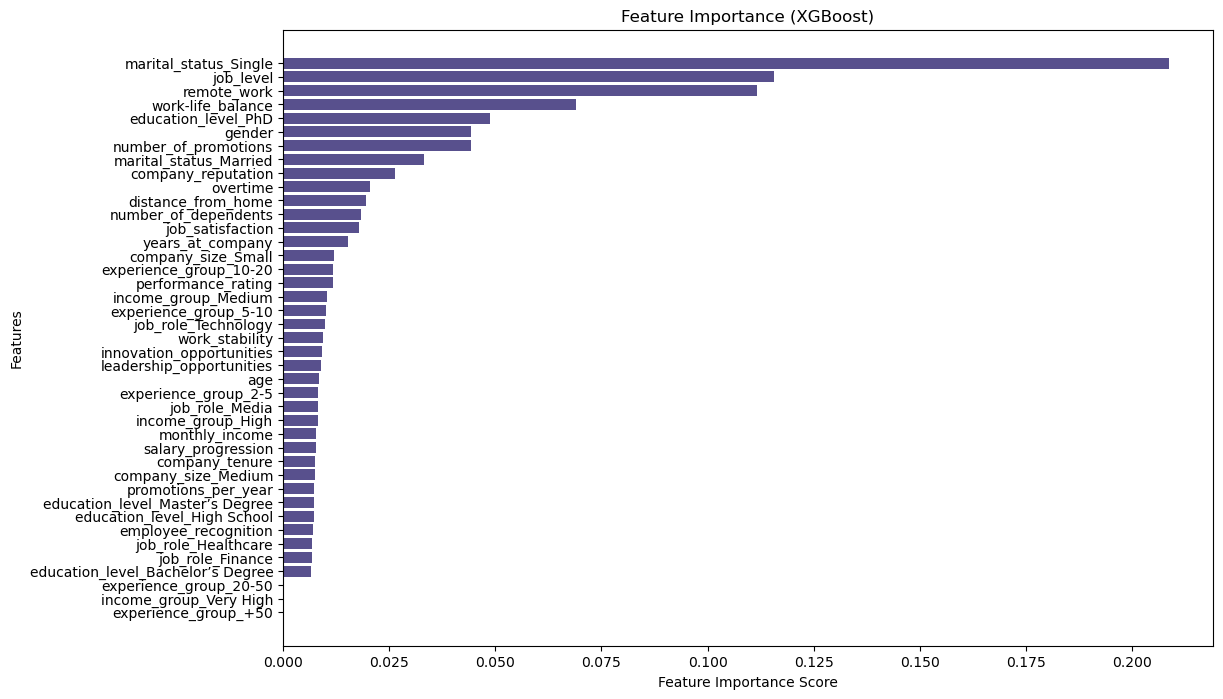

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained XGBoost model
feature_importances = models["xgboost"].feature_importances_
feature_names = np.array(X.columns)

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color="#58508d")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

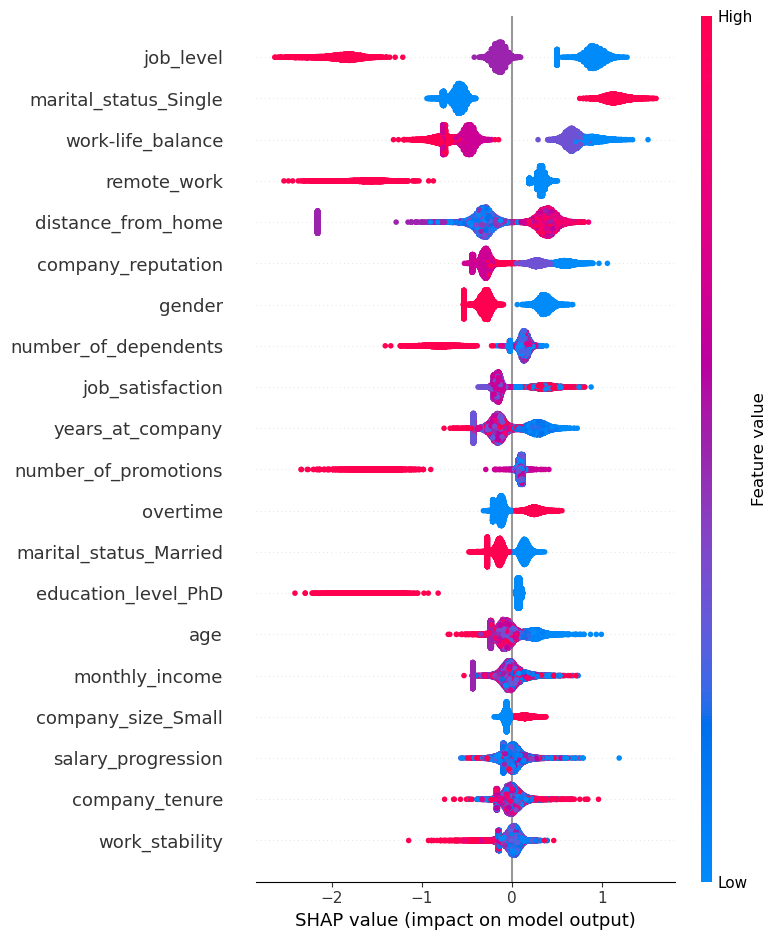

In [73]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(models["xgboost"])
shap_values = explainer(X_test)

# Plot SHAP summary plot to visualize feature impact
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test)


In [151]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Optuna optimization function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }
    
    # Additional threshold optimization
    threshold = trial.suggest_float("threshold", 0.2, 0.8)  # Custom threshold range

    # Train model
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss", random_state=42)
    model.fit(X_train, y_train)

    # Get probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (attrition)

    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return f1  # Optimize for F1-score (or change to another metric if needed)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # 50 trials for optimization

# Display best results
print("Best hyperparameters:", study.best_params)
best_threshold = study.best_params["threshold"]
print("Best threshold:", best_threshold)

# Train final model with best parameters
best_xgb = XGBClassifier(**{k: v for k, v in study.best_params.items() if k != "threshold"},
                         use_label_encoder=False, eval_metric="logloss", random_state=42)
best_xgb.fit(X_train, y_train)

# Apply best threshold to final model
y_probs_best = best_xgb.predict_proba(X_test)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Final evaluation
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

print(f"Final Model Performance - Accuracy: {final_accuracy:.4f}, Precision: {final_precision:.4f}, Recall: {final_recall:.4f}, F1: {final_f1:.4f}")



[I 2025-02-05 20:15:45,326] A new study created in memory with name: no-name-2eb9fa61-8561-42b1-bf72-414d60b121bd
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-05 20:15:50,644] Trial 0 finished with value: 0.7573366214549938 and parameters: {'n_estimators': 300, 'max_depth': 14, 'learning_rate': 0.011729785585042014, 'subsample': 0.555839317045637, 'colsample_bytree': 0.9900572232166962, 'gamma': 0.07807824581303802, 'reg_alpha': 3.5656126286040406, 'reg_lambda': 4.894946954279895, 'threshold': 0.36002263860661093}. Best is trial 0 with value: 0.7573366214549938.
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:15:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-c

Best hyperparameters: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.07208644505122, 'subsample': 0.6929245122685816, 'colsample_bytree': 0.6406121204335561, 'gamma': 3.9515162724271136, 'reg_alpha': 0.947008781126661, 'reg_lambda': 1.2221217811384666, 'threshold': 0.3473399611028582}
Best threshold: 0.3473399611028582
Final Model Performance - Accuracy: 0.7552, Precision: 0.6820, Recall: 0.8609, F1: 0.7610


In [153]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Define Optuna optimization function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 3.0),  # Handles class imbalance
    }
    
    # Additional threshold optimization
    threshold = trial.suggest_float("threshold", 0.2, 0.8)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store results
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train model
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss", random_state=42)
        model.fit(X_tr, y_tr)

        # Get probabilities
        y_probs = model.predict_proba(X_val)[:, 1]

        # Apply custom threshold
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate F1-score
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    # Return mean F1-score from CV
    return np.mean(f1_scores)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Run 50 trials

# Display best results
best_params = study.best_params
best_threshold = best_params.pop("threshold")  # Extract best threshold
print("Best hyperparameters:", best_params)
print("Best threshold:", best_threshold)

# Train final model with best parameters
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
best_xgb.fit(X_train, y_train)

# Apply best threshold to final model
y_probs_best = best_xgb.predict_proba(X_test)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Final evaluation on test set
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)
final_auc = roc_auc_score(y_test, y_probs_best)

print(f"Final Model Performance:\n"
      f"Accuracy: {final_accuracy:.4f}\n"
      f"Precision: {final_precision:.4f}\n"
      f"Recall: {final_recall:.4f}\n"
      f"F1-score: {final_f1:.4f}\n"
      f"AUC-ROC: {final_auc:.4f}")


[I 2025-02-05 20:26:51,832] A new study created in memory with name: no-name-7991f6e9-4f23-4809-beda-7c96524fbad6
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:27:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameter

Best hyperparameters: {'n_estimators': 350, 'max_depth': 13, 'learning_rate': 0.06633690622415053, 'subsample': 0.7411613593619661, 'colsample_bytree': 0.7932890872012629, 'gamma': 4.595609639172438, 'reg_alpha': 4.3810562800864545, 'reg_lambda': 2.221909215166303, 'min_child_weight': 8, 'scale_pos_weight': 0.9293790415619452}
Best threshold: 0.3337967252656917
Final Model Performance:
Accuracy: 0.7537
Precision: 0.6806
Recall: 0.8593
F1-score: 0.7596
AUC-ROC: 0.8618


In [155]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the two sets of best hyperparameters
best_params_1 = {
    'n_estimators': 700,
    'max_depth': 6,
    'learning_rate': 0.07208644505122,
    'subsample': 0.6929245122685816,
    'colsample_bytree': 0.6406121204335561,
    'gamma': 3.9515162724271136,
    'reg_alpha': 0.947008781126661,
    'reg_lambda': 1.2221217811384666
}

best_threshold_1 = 0.3473399611028582

best_params_2 = {
    'n_estimators': 350,
    'max_depth': 13,
    'learning_rate': 0.06633690622415053,
    'subsample': 0.7411613593619661,
    'colsample_bytree': 0.7932890872012629,
    'gamma': 4.595609639172438,
    'reg_alpha': 4.3810562800864545,
    'reg_lambda': 2.221909215166303,
    'min_child_weight': 8,
    'scale_pos_weight': 0.9293790415619452
}

best_threshold_2 = 0.3337967252656917

# Function to train and evaluate the model
def train_and_evaluate(params, threshold, X_train, X_test, y_train, y_test, model_name):
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss", random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_probs)

    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("-" * 50)

    return {
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc_roc": auc_roc
    }

# Train and compare both models
results = []
results.append(train_and_evaluate(best_params_1, best_threshold_1, X_train, X_test, y_train, y_test, "XGBoost_Config_1"))
results.append(train_and_evaluate(best_params_2, best_threshold_2, X_train, X_test, y_train, y_test, "XGBoost_Config_2"))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost_Config_1
Accuracy: 0.7552
Precision: 0.6820
Recall: 0.8609
F1-score: 0.7610
AUC-ROC: 0.8617
--------------------------------------------------


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost_Config_2
Accuracy: 0.7537
Precision: 0.6806
Recall: 0.8593
F1-score: 0.7596
AUC-ROC: 0.8618
--------------------------------------------------
              model  accuracy  precision    recall  f1_score   auc_roc
0  XGBoost_Config_1  0.755186   0.681955  0.860877  0.761041  0.861656
1  XGBoost_Config_2  0.753659   0.680579  0.859331  0.759580  0.861814


In [171]:
def evaluate_with_threshold(model, X_test, y_test, threshold):
    """Evaluates a model using a specific threshold."""
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    print(f"Threshold: {threshold:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("-" * 50)

    return accuracy, precision, recall, f1, auc

# Evaluate individual models with new thresholds
print("Optimized XGBoost_Config_1:")
evaluate_with_threshold(best_xgb_1, X_test, y_test, new_best_threshold_1)

print("Optimized XGBoost_Config_2:")
evaluate_with_threshold(best_xgb_2, X_test, y_test, new_best_threshold_2)

# Evaluate ensemble model with its optimized threshold
def evaluate_ensemble(models, X_test, y_test, threshold):
    """Evaluates the ensemble model using an optimized threshold."""
    y_probs = np.mean([model.predict_proba(X_test)[:, 1] for model in models], axis=0)
    y_pred = (y_probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    print(f"Ensemble Model (Average Probabilities) - Threshold: {threshold:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("-" * 50)

    return accuracy, precision, recall, f1, auc


Optimized XGBoost_Config_1:
Threshold: 0.3486
Accuracy: 0.7560
Precision: 0.6829
Recall: 0.8606
F1 Score: 0.7615
AUC-ROC: 0.8617
--------------------------------------------------
Optimized XGBoost_Config_2:
Threshold: 0.2848
Accuracy: 0.7446
Precision: 0.6604
Recall: 0.8978
F1 Score: 0.7610
AUC-ROC: 0.8618
--------------------------------------------------


In [173]:
# Train Model 1
best_xgb_1 = XGBClassifier(
    n_estimators=700, max_depth=6, learning_rate=0.07208644505122,
    subsample=0.6929245122685816, colsample_bytree=0.6406121204335561,
    gamma=3.9515162724271136, reg_alpha=0.947008781126661,
    reg_lambda=1.2221217811384666, use_label_encoder=False,
    eval_metric="logloss", random_state=42
)
best_xgb_1.fit(X_train, y_train)

# Train Model 2
best_xgb_2 = XGBClassifier(
    n_estimators=350, max_depth=13, learning_rate=0.06633690622415053,
    subsample=0.7411613593619661, colsample_bytree=0.7932890872012629,
    gamma=4.595609639172438, reg_alpha=4.3810562800864545,
    reg_lambda=2.221909215166303, min_child_weight=8,
    scale_pos_weight=0.9293790415619452, use_label_encoder=False,
    eval_metric="logloss", random_state=42
)
best_xgb_2.fit(X_train, y_train)


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7932890872012629, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=4.595609639172438, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06633690622415053,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Best Threshold for Model: 0.34855344891548157


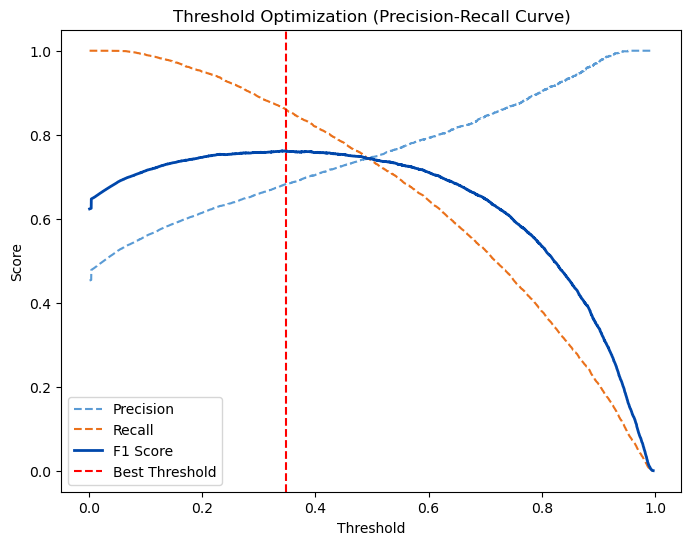

Best Threshold for Model: 0.28481701016426086


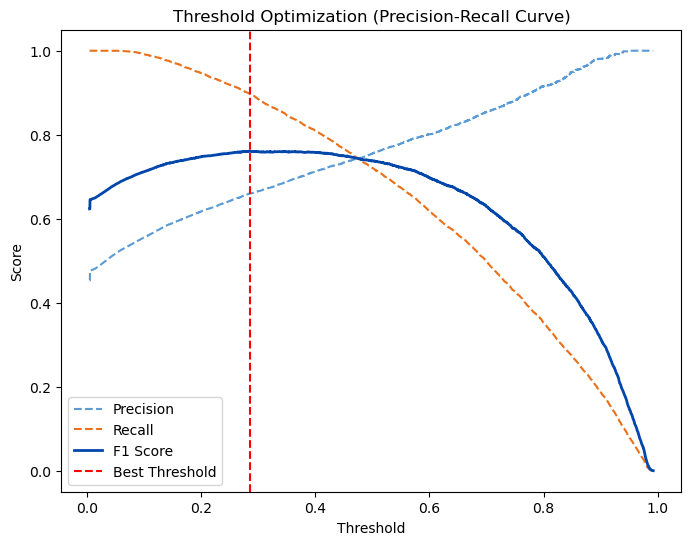

Best Threshold for Ensemble Model: 0.38216185569763184


In [174]:
# Find the best threshold for each individual model
new_best_threshold_1 = find_best_threshold(best_xgb_1, X_test, y_test)
new_best_threshold_2 = find_best_threshold(best_xgb_2, X_test, y_test)

# Find the best threshold for the ensemble model
new_best_threshold_ensemble = find_best_threshold_ensemble([best_xgb_1, best_xgb_2], X_test, y_test)


In [175]:
# Evaluate individual models with optimized thresholds
print("Optimized XGBoost_Config_1:")
evaluate_with_threshold(best_xgb_1, X_test, y_test, new_best_threshold_1)

print("Optimized XGBoost_Config_2:")
evaluate_with_threshold(best_xgb_2, X_test, y_test, new_best_threshold_2)

# Evaluate the ensemble model with its optimized threshold
evaluate_ensemble([best_xgb_1, best_xgb_2], X_test, y_test, new_best_threshold_ensemble)


Optimized XGBoost_Config_1:
Threshold: 0.3486
Accuracy: 0.7560
Precision: 0.6829
Recall: 0.8606
F1 Score: 0.7615
AUC-ROC: 0.8617
--------------------------------------------------
Optimized XGBoost_Config_2:
Threshold: 0.2848
Accuracy: 0.7446
Precision: 0.6604
Recall: 0.8978
F1 Score: 0.7610
AUC-ROC: 0.8618
--------------------------------------------------
Ensemble Model (Average Probabilities) - Threshold: 0.3822
Accuracy: 0.7631
Precision: 0.7013
Recall: 0.8307
F1 Score: 0.7605
AUC-ROC: 0.8622
--------------------------------------------------


(0.7630775105001909,
 0.7012694269782892,
 0.8306632939853851,
 0.7605017690575748,
 0.8621706147330758)

C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-p

Best Threshold for Model: 0.31814752112223527


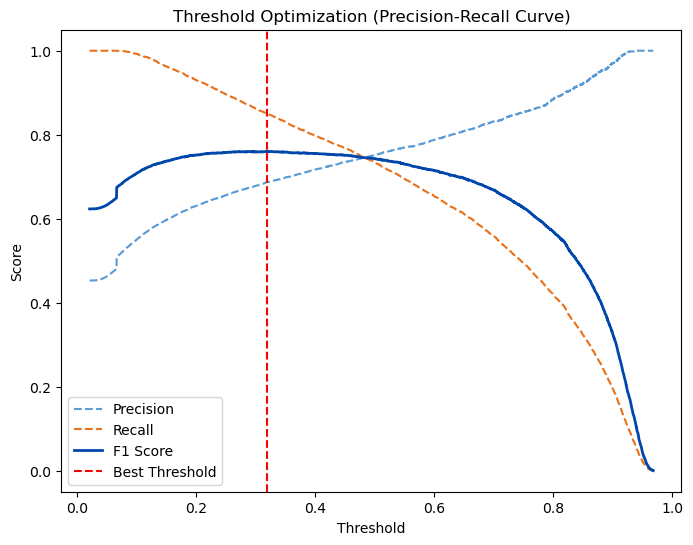

Threshold: 0.3181
Accuracy: 0.7570
Precision: 0.6871
Recall: 0.8509
F1 Score: 0.7602
AUC-ROC: 0.8611
--------------------------------------------------


(0.7569683085147003,
 0.687053216838761,
 0.8508993816750984,
 0.7602486031765961,
 0.8610792887374228)

In [179]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ("xgb1", best_xgb_1),
        ("xgb2", best_xgb_2)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True  # Pass original features as well
)

# Train and evaluate
stacking_clf.fit(X_train, y_train)
stacking_threshold = find_best_threshold(stacking_clf, X_test, y_test)  # Optimize threshold
evaluate_with_threshold(stacking_clf, X_test, y_test, stacking_threshold)


In [180]:
def weighted_ensemble(models, weights, X_test, y_test, threshold):
    """Creates an ensemble model using weighted averaging of probabilities."""
    y_probs = np.average([model.predict_proba(X_test)[:, 1] for model in models], axis=0, weights=weights)
    y_pred = (y_probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    print(f"Weighted Ensemble Model - Threshold: {threshold:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("-" * 50)

    return accuracy, precision, recall, f1, auc

# Assign weights (you can tune these based on individual model performance)
weights = [0.6, 0.4]  # Giving more weight to the better performing model

# Find the best threshold for the weighted ensemble
weighted_threshold = find_best_threshold_ensemble([best_xgb_1, best_xgb_2], X_test, y_test)

# Evaluate the weighted ensemble
weighted_ensemble([best_xgb_1, best_xgb_2], weights, X_test, y_test, weighted_threshold)


Best Threshold for Ensemble Model: 0.38216185569763184
Weighted Ensemble Model - Threshold: 0.3822
Accuracy: 0.7626
Precision: 0.7002
Recall: 0.8318
F1 Score: 0.7604
AUC-ROC: 0.8621
--------------------------------------------------


(0.7625684103347333,
 0.7002247722702,
 0.831787521079258,
 0.7603571199177853,
 0.8621313556978427)

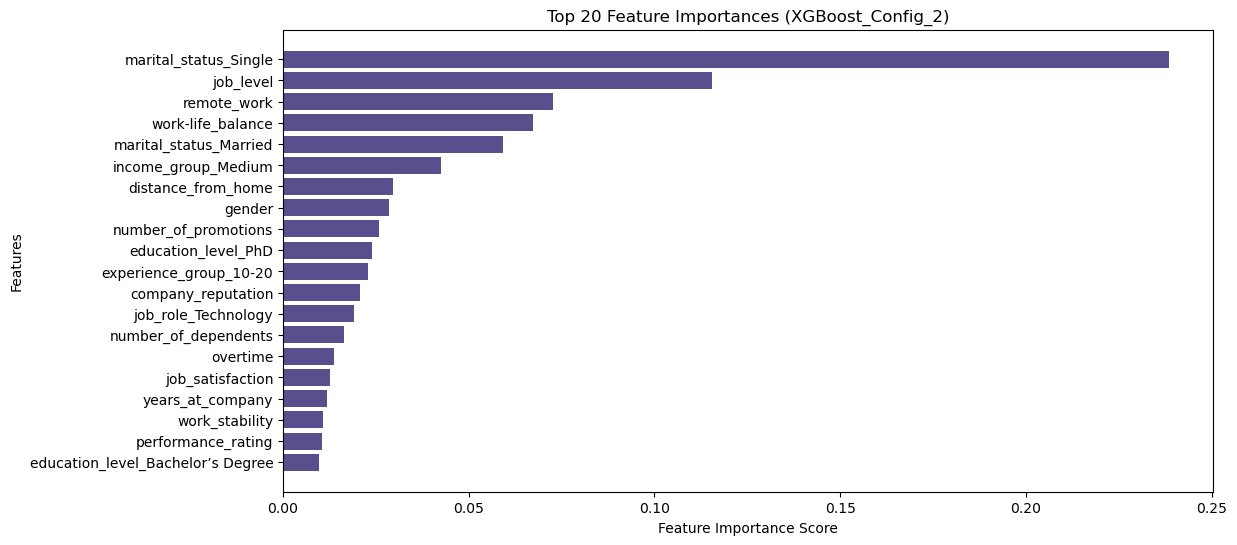

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the final XGBoost model
feature_importances = best_xgb_2.feature_importances_
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_idx][:20], feature_importances[sorted_idx][:20], color="#58508d")  # Top 20 features
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances (XGBoost_Config_2)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


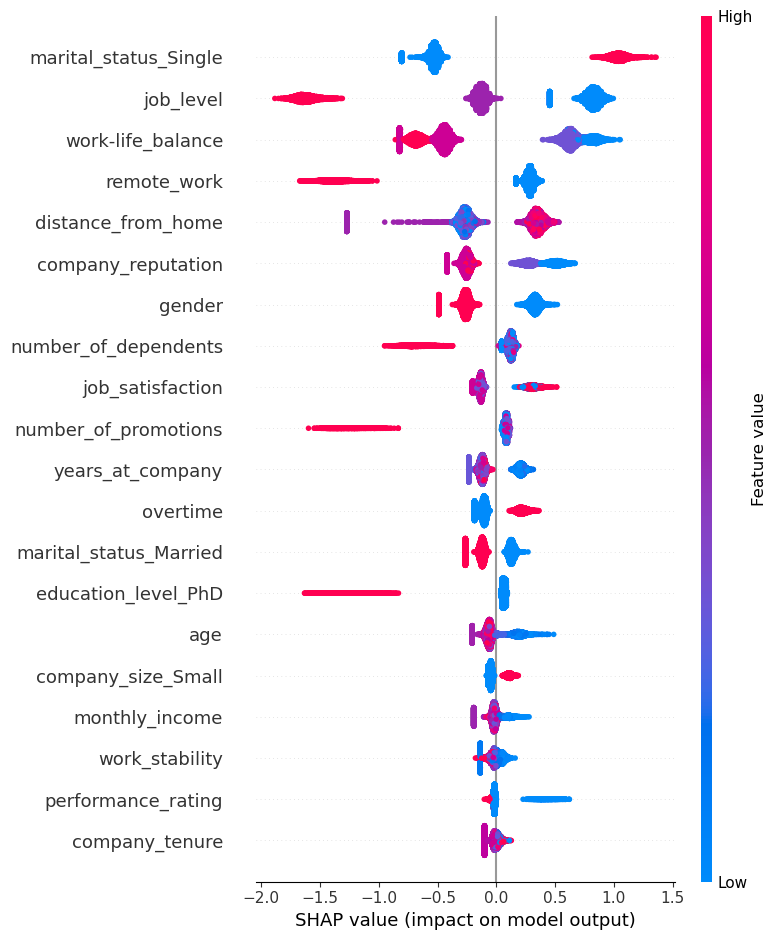

In [187]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(best_xgb_2)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)



In [189]:
# Assumed cost values (modify based on real estimates)
cost_false_negative = 50000  # Average loss per unexpected attrition (recruitment, training, lost productivity)
cost_false_positive = 5000   # Average unnecessary retention cost (bonuses, promotions, perks)

# Calculate False Negatives & False Positives
from sklearn.metrics import confusion_matrix

y_probs = best_xgb_2.predict_proba(X_test)[:, 1]  # Get probabilities
y_pred = (y_probs >= 0.2848).astype(int)  # Apply optimized threshold

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Total Cost Calculation
total_cost_fn = fn * cost_false_negative  # Cost of unexpected attrition
total_cost_fp = fp * cost_false_positive  # Cost of unnecessary retention

print(f"False Negatives: {fn}, Estimated Cost: ${total_cost_fn:,.2f}")
print(f"False Positives: {fp}, Estimated Cost: ${total_cost_fp:,.2f}")
print(f"Total Estimated Cost of Model Errors: ${total_cost_fn + total_cost_fp:,.2f}")


False Negatives: 727, Estimated Cost: $36,350,000.00
False Positives: 3286, Estimated Cost: $16,430,000.00
Total Estimated Cost of Model Errors: $52,780,000.00


In [197]:
pip install lifelines

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=c2bfc93c6aeee430891ad30710424188c237c5f41991af5520344c48baed2cdb
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\8b\67\f4\2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [319]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import pandas as pd

# Crear la variable de tiempo y evento (1 si se fue, 0 si sigue)
survival_data = clean_merged[["years_at_company_original", "attrition"]]
survival_data.rename(columns={"years_at_company_original": "duration", "attrition": "event"}, inplace=True)

# Revisar distribución
print(survival_data.head())


   duration  event
0      13.0      0
1      13.0      0
2      13.0      0
3      13.0      0
4      13.0      0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16720\932035982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data.rename(columns={"years_at_company_original": "duration", "attrition": "event"}, inplace=True)


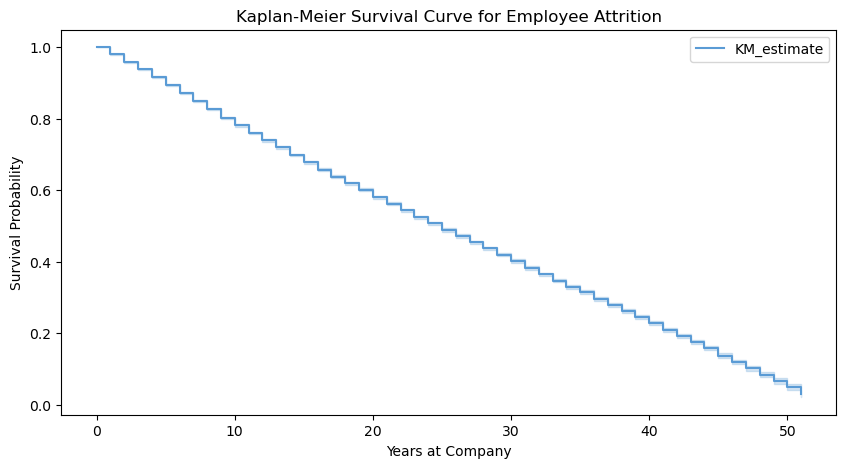

In [321]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data["duration"], event_observed=survival_data["event"])

# Plot de la curva de supervivencia
plt.figure(figsize=(10, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for Employee Attrition")
plt.xlabel("Years at Company")
plt.ylabel("Survival Probability")
plt.show()

In [325]:
cox_data = clean_merged.copy()
cox_data["event"] = clean_merged["attrition"]  # Variable de evento
cox_data["duration"] = clean_merged["years_at_company_original"]  # Variable de tiempo

cox_features = cox_data.drop(columns=["attrition", "new_employee_id"])  # Quitar ID y target
cox_model = CoxPHFitter()
cox_model.fit(cox_features, duration_col="duration", event_col="event")

# Mostrar coeficientes del modelo
cox_model.print_summary()

# Plot de hazard ratios
cox_model.plot()
plt.title("Hazard Ratios (Cox Model) for Employee Attrition")
plt.show()


C:\Users\Usuario\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column years_at_company has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column years_at_company_original has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.